# Module 03

## Session 09 Unsupervised Learning

# Agglomerative Clustering

Analyze data "ilustrasi k means.csv"
* plot the data using scatter plot
* make dendrograms
    - ward linkage
    - average linkage
    - complete linkage
* compare the result:
    - is it different?
    - what about another data?
* plot the data and clustering result (optimal number of cluster from either ward, average, complete) using scatter plot

# Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, average, complete

# Data

In [3]:
X = pd.read_csv('./datasets/ilustrasi k means.csv', sep=';')
X.head()

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181


# EDA

Text(0, 0.5, 'Tinggi Badan Istri')

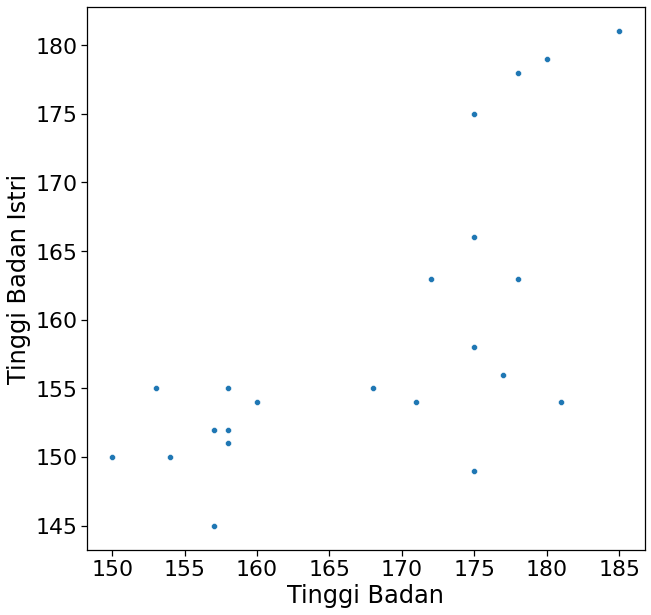

In [4]:
plt.figure(figsize=(10,10))

sns.set_context(context='notebook', font_scale=2)
sns.scatterplot(
    x='tinggibadan', 
    y='tinggibadanistri', 
    data=X
)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

# Dendrograms

## 1. Ward Linkage

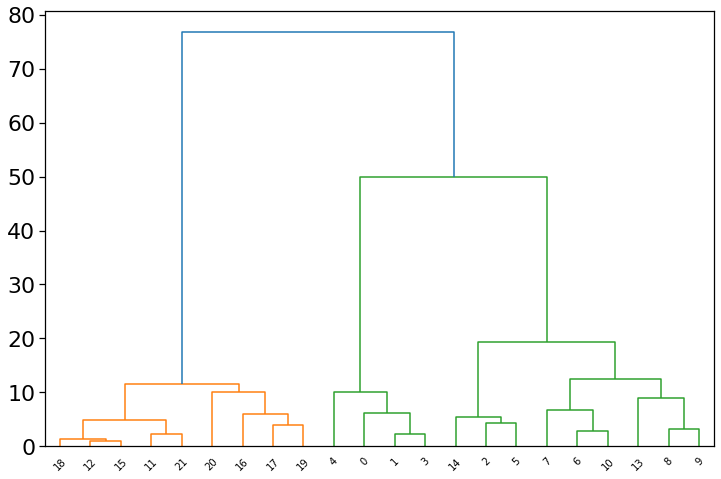

In [8]:
plt.figure(figsize=(12,8))

linkage_array = ward(X)
dendrogram(linkage_array)

plt.show()

Interpretation:
1. 2 clusters at 70
2. 3 clusters at 50
3. 4 clusters at 20
4. 5 clusters at 12

objective:
* each cluster have different characteristic
* data distance inside the cluster are close

distance criteria oncluster to cluster:
- higher distance (problem on the data distance inside the cluster)
- lower distance (probably still have the same characteristic)

To pick optimum number of cluster based on distance:
1. 2 clusters to 3 clusters: 20
2. 3 clusters to 4 clusters: 30 (choose the largest number)
3. 4 clusters to 5 clusters: 8

then the optimum number of cluster are 3 clusters

## 2. Average Linkage

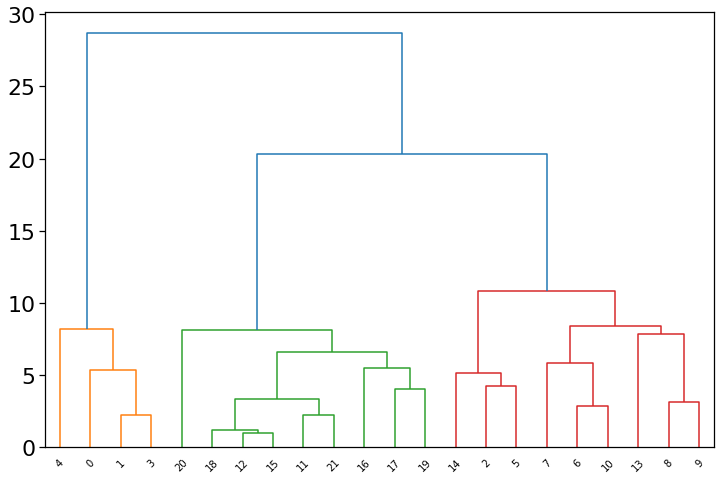

In [9]:
plt.figure(figsize=(12,8))

linkage_array = average(X)
dendrogram(linkage_array)

plt.show()

## 3. Complete Linkage

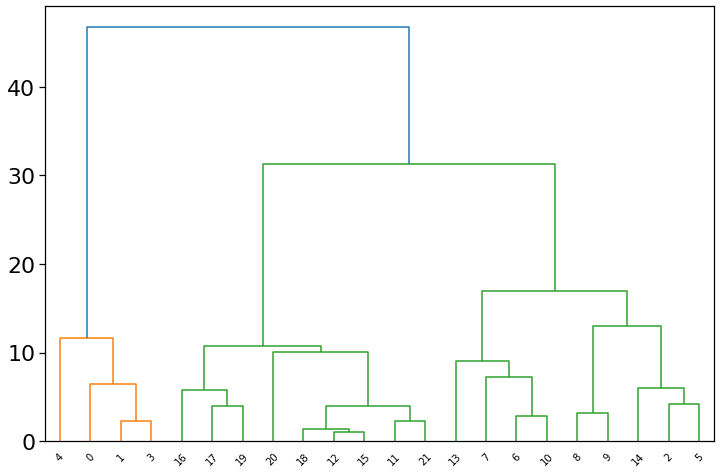

In [10]:
plt.figure(figsize=(12,8))

linkage_array = complete(X)
dendrogram(linkage_array)

plt.show()

In [11]:
linkage_array

array([[12.        , 15.        ,  1.        ,  2.        ],
       [18.        , 22.        ,  1.41421356,  3.        ],
       [ 1.        ,  3.        ,  2.23606798,  2.        ],
       [11.        , 21.        ,  2.23606798,  2.        ],
       [ 6.        , 10.        ,  2.82842712,  2.        ],
       [ 8.        ,  9.        ,  3.16227766,  2.        ],
       [23.        , 25.        ,  4.        ,  5.        ],
       [17.        , 19.        ,  4.        ,  2.        ],
       [ 2.        ,  5.        ,  4.24264069,  2.        ],
       [16.        , 29.        ,  5.83095189,  3.        ],
       [14.        , 30.        ,  6.        ,  3.        ],
       [ 0.        , 24.        ,  6.40312424,  3.        ],
       [ 7.        , 26.        ,  7.21110255,  3.        ],
       [13.        , 34.        ,  9.        ,  4.        ],
       [20.        , 28.        , 10.04987562,  6.        ],
       [31.        , 36.        , 10.77032961,  9.        ],
       [ 4.        , 33.

In [12]:
len(linkage_array)

21

# Clustering

In [13]:
clus_ward = AgglomerativeClustering(linkage='ward', n_clusters=3)
X['ward_result'] = clus_ward.fit_predict(X)

clus_average = AgglomerativeClustering(linkage='average', n_clusters=3)
X['average_result'] = clus_average.fit_predict(X)

clus_complete = AgglomerativeClustering(linkage='complete', n_clusters=3)
X['complete_result'] = clus_complete.fit_predict(X)


In [15]:
X.head()

,tinggibadan,tinggibadanistri,ward_result,average_result,complete_result
0,175,175,2,1,1
1,178,178,2,1,1
2,175,166,0,0,0
3,180,179,2,1,1
4,185,181,2,1,1


# Visualization

Text(0, 0.5, 'Tinggi Badan Istri')

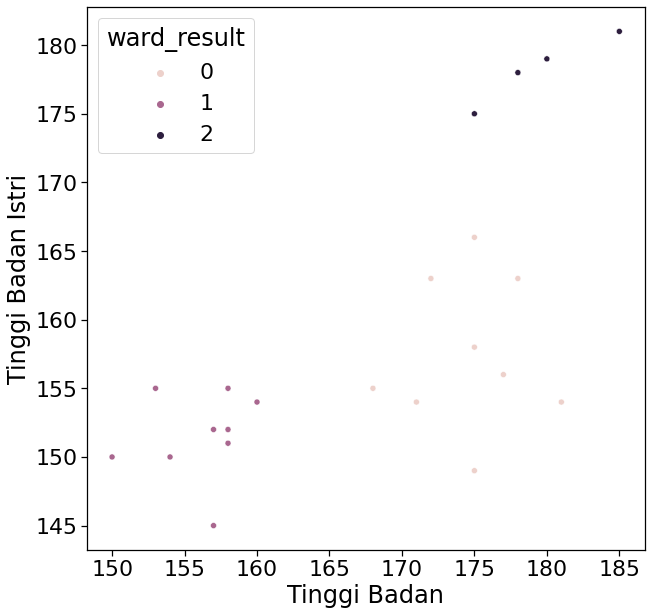

In [16]:
plt.figure(figsize=(10,10))

sns.set_context(context='notebook', font_scale=2)
sns.scatterplot(
    x='tinggibadan', 
    y='tinggibadanistri', 
    data=X,
    hue='ward_result'
)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')